In [20]:
# ==========================================================
# CÉLULA DE CONFIGURAÇÃO - IMPORTS E CARREGAMENTO DE DADOS
# ==========================================================
import pandas as pd
import plotly.express as px
from pathlib import Path
from IPython.display import display, HTML
import base64 # Para embutir imagens no relatório

# Carregamento e limpeza (código que já funciona)
notebook_path = Path.cwd()
caminho_arquivo = notebook_path.parent / "Dados-brutos-Resgate-Guanhães_2025.xlsx"
df = pd.read_excel(caminho_arquivo, sheet_name='dados_brutos')

df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, errors='coerce')
df.dropna(subset=['Data'], inplace=True)
cols_numericas = ['N°_Individuos', 'Biomassa_(g)']
for col in cols_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[cols_numericas] = df[cols_numericas].fillna(0)

print("Setup concluído. Dados carregados e limpos.")

Setup concluído. Dados carregados e limpos.


In [21]:
# ==========================================================
# <<< CONTROLE DO RELATÓRIO: EDITE AQUI >>>
# ==========================================================

# 1. Defina a data para o relatório diário
DATA_DO_RELATORIO = "2024-10-25" # Formato AAAA-MM-DD

# 2. Defina o nome das duas fotos do dia
# (O código vai procurar na pasta: ../fotos_atividades/AAAA-MM-DD/)
NOME_FOTO_1 = "foto1.jpg" # Coloque aqui o nome exato do arquivo
NOME_FOTO_2 = "biometria.png" # Coloque aqui o nome exato do arquivo

# 3. Defina as legendas para as fotos
LEGENDA_FOTO_1 = "Visão geral da área de resgate."
LEGENDA_FOTO_2 = "Processo de biometria de espécime."

# ==========================================================
# Filtra o dataframe para conter apenas os dados do dia
df_dia = df[df['Data'] == pd.to_datetime(DATA_DO_RELATORIO)]
print(f"Relatório configurado para o dia: {DATA_DO_RELATORIO}")

Relatório configurado para o dia: 2024-10-25


# Relatório Diário de Atividades - PCH Senhora do Porto
## Resultados do Dia:


In [23]:
# ==========================================================
# KPIs E FOTOS DO DIA
# ==========================================================

# Exibe a data do relatório de forma destacada
display(HTML(f"<h3>Data: {pd.to_datetime(DATA_DO_RELATORIO).strftime('%d/%m/%Y')}</h3>"))

if df_dia.empty:
    display(HTML("<p><b>Nenhuma atividade registrada para esta data.</b></p>"))
else:
    # --- KPIs do Dia ---
    total_dia = int(df_dia['N°_Individuos'].sum())
    vivos_dia = int(df_dia[df_dia['Destino'] == 'Vivo']['N°_Individuos'].sum())
    mortos_dia = total_dia - vivos_dia
    taxa_sobrevivencia_dia = (vivos_dia / total_dia * 100) if total_dia > 0 else 0
    
    kpi_html = f"""
    <table style="width:100%; border: none;">
      <tr style="text-align: center;">
        <td><h2>{total_dia}</h2><p>Indivíduos Manejados</p></td>
        <td><h2>{vivos_dia}</h2><p>Resgatados Vivos</p></td>
        <td><h2>{taxa_sobrevivencia_dia:.1f}%</h2><p>Taxa de Sobrevivência</p></td>
      </tr>
    </table>
    """
    display(HTML(kpi_html))

    # --- Galeria de Fotos ---
    def img_to_html(path):
        try:
            with open(path, "rb") as f:
                encoded_string = base64.b64encode(f.read()).decode()
            return f'<img src="data:image/jpeg;base64,{encoded_string}" style="width:100%;">'
        except FileNotFoundError:
            return "<p><i>Imagem não encontrada.</i></p>"

    fotos_path = notebook_path.parent / "fotos_atividades" / DATA_DO_RELATORIO
    html_fotos = f"""
    <hr>
    <h4>Registro Fotográfico do Dia</h4>
    <table style="width:100%; border: none;">
      <tr style="text-align: center;">
        <td style="width:50%; padding: 5px;">{img_to_html(fotos_path / NOME_FOTO_1)}<p><i>{LEGENDA_FOTO_1}</i></p></td>
        <td style="width:50%; padding: 5px;">{img_to_html(fotos_path / NOME_FOTO_2)}<p><i>{LEGENDA_FOTO_2}</i></p></td>
      </tr>
    </table>
    """
    display(HTML(html_fotos))

28Indivíduos Manejados,0Resgatados Vivos,0.0%Taxa de Sobrevivência


Imagem não encontrada.Visão geral da área de resgate.,Imagem não encontrada.Processo de biometria de espécime.


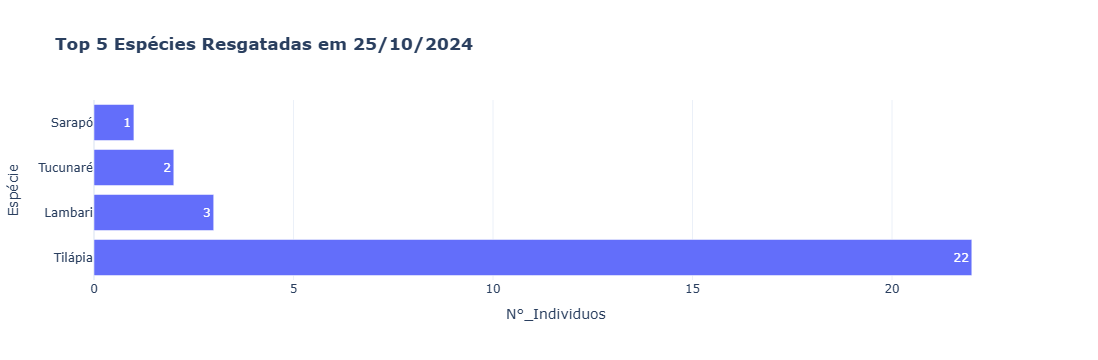

In [24]:
# ==========================================================
# GRÁFICO DO DIA
# ==========================================================
if not df_dia.empty:
    especies_dia = df_dia.groupby('Nome_popular')['N°_Individuos'].sum().sort_values(ascending=False).head(5)
    
    fig_dia = px.bar(
        especies_dia,
        y=especies_dia.index,
        x='N°_Individuos',
        orientation='h',
        title=f"<b>Top 5 Espécies Resgatadas em {pd.to_datetime(DATA_DO_RELATORIO).strftime('%d/%m/%Y')}</b>",
        text_auto=True
    )
    fig_dia.update_layout(yaxis_title="Espécie")
    fig_dia.show()

---
# Visão Geral Acumulada do Projeto
## Resultados Totais até a Data do Relatório


28Total de Indivíduos Manejados,5Nº de Espécies Distintas,0.0%Taxa de Sobrevivência Geral


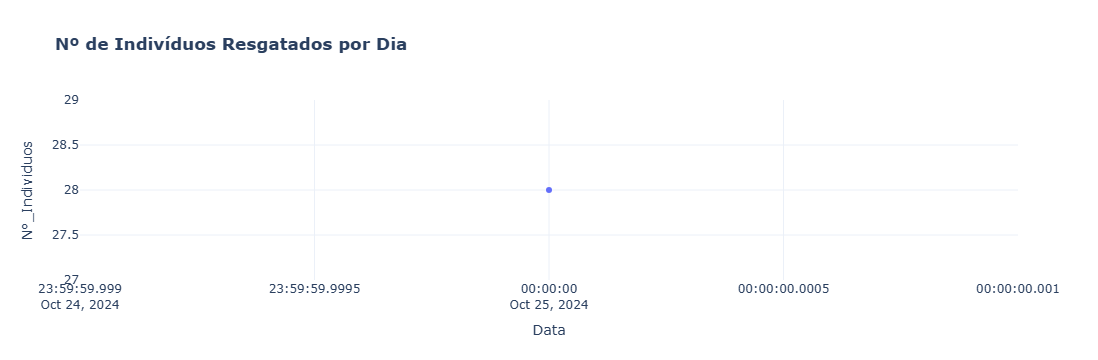

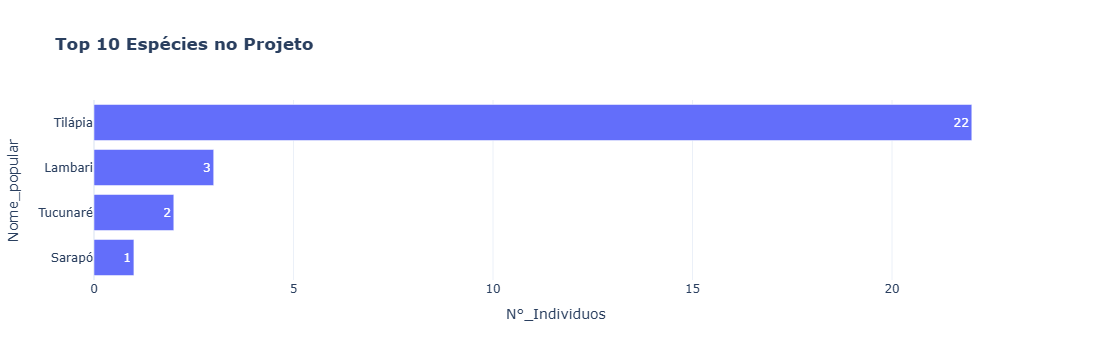

In [25]:
# ==========================================================
# KPIs E GRÁFICOS ACUMULADOS
# ==========================================================
df_acumulado = df[df['Data'] <= pd.to_datetime(DATA_DO_RELATORIO)]

# --- KPIs Acumulados ---
total_acumulado = int(df_acumulado['N°_Individuos'].sum())
vivos_acumulado = int(df_acumulado[df_acumulado['Destino'] == 'Vivo']['N°_Individuos'].sum())
taxa_sobrevivencia_acumulada = (vivos_acumulado / total_acumulado * 100) if total_acumulado > 0 else 0

kpi_acumulado_html = f"""
<table style="width:100%; border: none;">
  <tr style="text-align: center;">
    <td><h2>{total_acumulado}</h2><p>Total de Indivíduos Manejados</p></td>
    <td><h2>{df_acumulado['Espécie'].nunique()}</h2><p>Nº de Espécies Distintas</p></td>
    <td><h2>{taxa_sobrevivencia_acumulada:.1f}%</h2><p>Taxa de Sobrevivência Geral</p></td>
  </tr>
</table><hr>
"""
display(HTML(kpi_acumulado_html))

# --- Gráfico de Linha Temporal ---
df_temporal = df_acumulado.groupby(df_acumulado['Data'].dt.date)['N°_Individuos'].sum().reset_index()
fig_temporal = px.line(
    df_temporal, x='Data', y='N°_Individuos', title="<b>Nº de Indivíduos Resgatados por Dia</b>", markers=True
)
fig_temporal.show()

# --- Gráfico Top 10 Espécies Acumulado ---
top_10_geral = df_acumulado.groupby('Nome_popular')['N°_Individuos'].sum().nlargest(10).sort_values()
fig_top10 = px.bar(
    top_10_geral, y=top_10_geral.index, x='N°_Individuos', orientation='h', title="<b>Top 10 Espécies no Projeto</b>", text_auto=True
)
fig_top10.show()